In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
X_train = X_train / 255
X_test = X_test / 255

Text(69.0, 0.5, 'Truth')

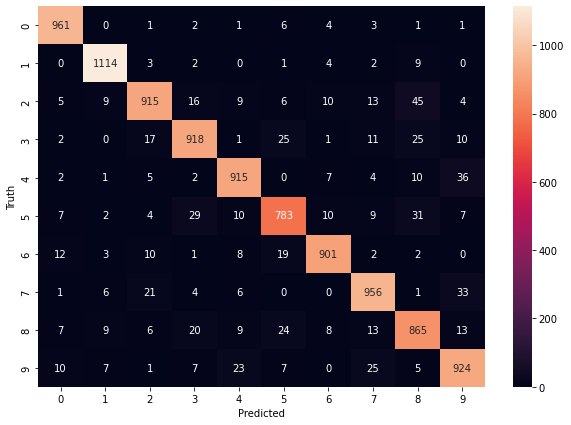

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
# Adding hidden layer now :)

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/nn-06', histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2708 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9849


In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9760


[0.07876142114400864, 0.9760000109672546]

Text(69.0, 0.5, 'Truth')

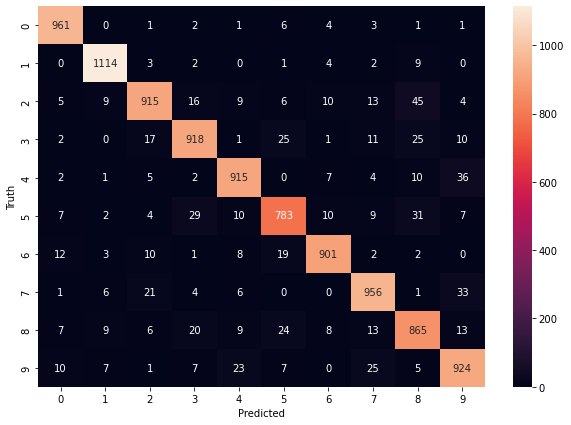

In [38]:
# y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(p) for p in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')